Single Run Estimates:
n         Avg Method          Area Method
1000      3.19979484          3.16000000
10000     3.14483106          3.12240000
100000    3.13916412          3.13896000

Monte Carlo Simulation (n = 10,000, 1,000 runs):
Method              MC Estimate    MC Std Error
Average Value       3.14139066     0.00892187
Area Method         3.14191000     0.01630241


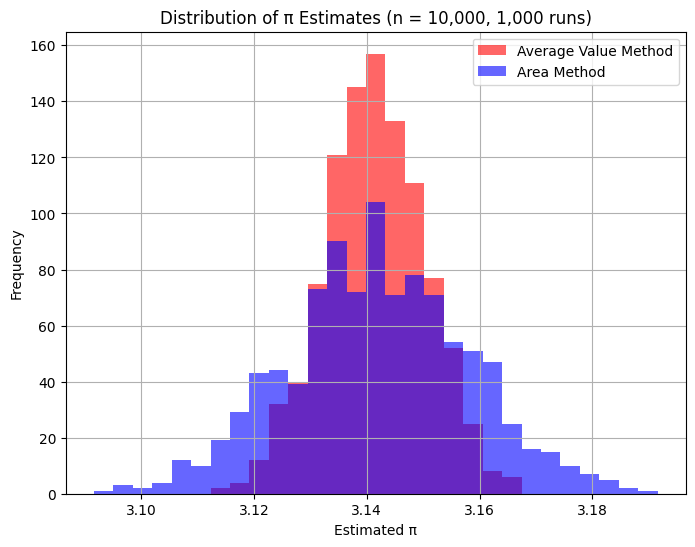

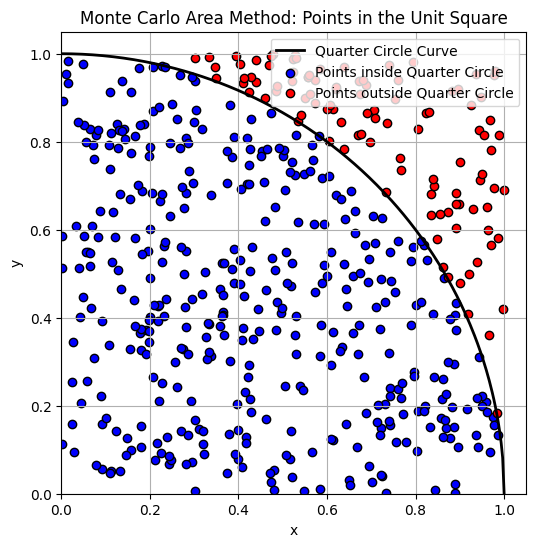

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set a reproducible random seed using digits of pi
np.random.seed(3141592)

# Define the function f(x) = sqrt(1 - x^2) for the quarter circle
def f(x):
    return np.sqrt(1 - x**2)

# -------------------------------
# 1. Single Run Demonstrations for Various Sample Sizes
# -------------------------------

def estimate_pi_avg(n):
    """
    Estimate π using the average value method.
    Draw n uniformly distributed x in [0,1] and evaluate f(x)=sqrt(1-x^2).
    Multiply the average by 4 to estimate π.
    """
    x = np.random.uniform(0, 1, n)
    y = f(x)
    pi_est = 4 * np.mean(y)
    return pi_est

def estimate_pi_area(n):
    """
    Estimate π using the area method.
    Draw n pairs of (x, y) uniformly in [0,1]^2.
    Count how many points fall below f(x)=sqrt(1-x^2), which represents the quarter circle.
    Multiply the proportion by 4 to estimate π.
    """
    x = np.random.uniform(0, 1, n)
    y = np.random.uniform(0, 1, n)
    count = np.sum(y < f(x))
    pi_est = 4 * (count / n)
    return pi_est

# Test different sample sizes
sample_sizes = [1000, 10000, 100000]
print("Single Run Estimates:")
print("n".ljust(10) + "Avg Method".ljust(20) + "Area Method")
for n in sample_sizes:
    pi_avg = estimate_pi_avg(n)
    pi_area = estimate_pi_area(n)
    print(f"{str(n).ljust(10)}{pi_avg:<20.8f}{pi_area:.8f}")

# -------------------------------
# 2. Repeated Monte Carlo Simulations (Distribution of Estimates)
# -------------------------------
# For a chosen sample size, e.g., n = 10,000, we perform many runs
n_fixed = 10000
num_runs = 1000

estimates_avg = np.zeros(num_runs)
estimates_area = np.zeros(num_runs)

for i in range(num_runs):
    estimates_avg[i] = estimate_pi_avg(n_fixed)
    estimates_area[i] = estimate_pi_area(n_fixed)

# Compute the Monte Carlo mean and standard error for each method
mean_avg = np.mean(estimates_avg)
std_avg  = np.std(estimates_avg)

mean_area = np.mean(estimates_area)
std_area  = np.std(estimates_area)

print("\nMonte Carlo Simulation (n = 10,000, 1,000 runs):")
print("Method".ljust(20) + "MC Estimate".ljust(15) + "MC Std Error")
print(f"{'Average Value':<20}{mean_avg:<15.8f}{std_avg:.8f}")
print(f"{'Area Method':<20}{mean_area:<15.8f}{std_area:.8f}")

# Overlay histograms for the two methods
plt.figure(figsize=(8, 6))
bins = np.linspace(np.pi - 0.05, np.pi + 0.05, 30)

plt.hist(estimates_avg, bins=bins, alpha=0.6, color='red', label='Average Value Method')
plt.hist(estimates_area, bins=bins, alpha=0.6, color='blue', label='Area Method')
plt.xlabel("Estimated π")
plt.ylabel("Frequency")
plt.title("Distribution of π Estimates (n = 10,000, 1,000 runs)")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 3. Visualization of the Quarter Circle and Sample Points (Area Method Demonstration)
# -------------------------------
# For demonstration, simulate a moderate number of points
n_demo = 500
x_demo = np.random.uniform(0, 1, n_demo)
y_demo = np.random.uniform(0, 1, n_demo)
y_curve = f(x_demo)

# Determine which points fall below the curve
inside = y_demo < y_curve

# Plot the quarter circle curve and sample points.
plt.figure(figsize=(6, 6))
# Plot the actual curve
x_curve = np.linspace(0, 1, 300)
plt.plot(x_curve, f(x_curve), 'k-', linewidth=2, label='Quarter Circle Curve')

# Scatter plot: points below the curve in blue, above in red.
plt.scatter(x_demo[inside], y_demo[inside], color='blue', edgecolor='k', label='Points inside Quarter Circle')
plt.scatter(x_demo[~inside], y_demo[~inside], color='red', edgecolor='k', label='Points outside Quarter Circle')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Monte Carlo Area Method: Points in the Unit Square")
plt.legend()
plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()
